In [10]:
import pandas as pd
from sklearn import datasets

titanic_url = ('Dataset/Water Treatment Plant Data Set/water-treatment.data')
data = pd.read_csv(titanic_url,names=[
        "Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"],
        engine='python',
        na_values="?")
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isnull().sum()))
data.describe()
data.dtypes

Number of instances = 527
Number of attributes = 38
Number of missing values:
	Q-E: 18
	ZN-E: 3
	PH-E: 0
	DBO-E: 23
	DQO-E: 6
	SS-E: 1
	SSV-E: 11
	SED-E: 25
	COND-E: 0
	PH-P: 0
	DBO-P: 40
	SS-P: 0
	SSV-P: 11
	SED-P: 24
	COND-P: 0
	PH-D: 0
	DBO-D: 28
	DQO-D: 9
	SS-D: 2
	SSV-D: 13
	SED-D: 25
	COND-D: 0
	PH-S: 1
	DBO-S: 23
	SQO-S: 18
	SS-S: 5
	SSV-S: 17
	SED-S: 28
	COND-S: 1
	RD-DBO-P: 62
	RD-SS-P: 4
	RD-SED-P: 27
	RD-DBO-S: 40
	RD-DQO-S: 26
	RD-DBO-G: 36
	RD-DQO-G: 25
	RD-SS-G: 8
	RD-SED-G: 31


Q-E         float64
ZN-E        float64
PH-E        float64
DBO-E       float64
DQO-E       float64
SS-E        float64
SSV-E       float64
SED-E       float64
COND-E        int64
PH-P        float64
DBO-P       float64
SS-P          int64
SSV-P       float64
SED-P       float64
COND-P        int64
PH-D        float64
DBO-D       float64
DQO-D       float64
SS-D        float64
SSV-D       float64
SED-D       float64
COND-D        int64
PH-S        float64
DBO-S       float64
SQO-S       float64
SS-S        float64
SSV-S       float64
SED-S       float64
COND-S      float64
RD-DBO-P    float64
RD-SS-P     float64
RD-SED-P    float64
RD-DBO-S    float64
RD-DQO-S    float64
RD-DBO-G    float64
RD-DQO-G    float64
RD-SS-G     float64
RD-SED-G    float64
dtype: object

In [11]:
#Impute missing value
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.metrics import accuracy_score
import impyute as impy
from sklearn.cluster import KMeans


print('-- Pure Dataset -- ')
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d\n' % (data.shape[1]))

dataset_drop = pd.read_csv(titanic_url,names=[
        "Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"],
        engine='python',
        na_values="?")

dataset_drop.dropna(inplace=True)
print('-- Impute Drop NaN Value -- ')
print('Number of instances = %d' % (dataset_drop.shape[0]))
print('Number of attributes = %d\n' % (dataset_drop.shape[1]))

print('-- Impute Median using Numpy to NaN Value -- ')
dataset_median = pd.read_csv(titanic_url,names=[
        "Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"],
        engine='python',
        na_values="?")
dataset_median = dataset_median.fillna(dataset_median.median())
print('Number of instances = %d' % (dataset_median.shape[0]))
print('Number of attributes = %d\n' % (dataset_median.shape[1]))

print('-- Impute mean using Numpy to NaN Value -- ')
dataset_mean = pd.read_csv(titanic_url,names=[
        "Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"],
        engine='python',
        na_values="?")
dataset_mean = dataset_mean.fillna(dataset_mean.mean())
print('Number of instances = %d' % (dataset_mean.shape[0]))
print('Number of attributes = %d\n' % (dataset_mean.shape[1]))

-- Pure Dataset -- 
Number of instances = 527
Number of attributes = 38

-- Impute Drop NaN Value -- 
Number of instances = 380
Number of attributes = 38

-- Impute Median using Numpy to NaN Value -- 
Number of instances = 527
Number of attributes = 38

-- Impute mean using Numpy to NaN Value -- 
Number of instances = 527
Number of attributes = 38



In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = dataset_mean[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    silhouette_score = metrics.silhouette_score(X_scaled,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_mean = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE MEAN")
clusters_df_mean[0:10]



c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


DATASET IMPUTE MEAN


,num_clusters,shilouette_score
0,2,0.116550
1,3,0.121931
2,4,0.123173
3,5,0.079658
4,6,0.089753
5,7,0.085753
6,8,0.092983
7,9,0.082963


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

X = dataset_median[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    silhouette_score = metrics.silhouette_score(X_scaled,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_median = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE MEDIAN")
clusters_df_median[0:10]

c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


DATASET IMPUTE MEDIAN


,num_clusters,shilouette_score
0,2,0.115842
1,3,0.121794
2,4,0.121917
3,5,0.080493
4,6,0.082474
5,7,0.087808
6,8,0.084547
7,9,0.081209


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

X = dataset_drop[["Q-E","ZN-E","PH-E","DBO-E","DQO-E","SS-E","SSV-E","SED-E","COND-E",
        "PH-P","DBO-P","SS-P","SSV-P","SED-P","COND-P","PH-D","DBO-D","DQO-D","SS-D"
        ,"SSV-D","SED-D","COND-D","PH-S","DBO-S","SQO-S","SS-S","SSV-S","SED-S","COND-S"
        ,"RD-DBO-P","RD-SS-P","RD-SED-P","RD-DBO-S","RD-DQO-S","RD-DBO-G","RD-DQO-G"
        ,"RD-SS-G","RD-SED-G"]]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cluster_range = range( 2, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_scaled )
    silhouette_score = metrics.silhouette_score(X_scaled,clusters.labels_,metric ='euclidean')
    cluster_errors.append( silhouette_score )

clusters_df_drop = pd.DataFrame( {"num_clusters":cluster_range, "shilouette_score": cluster_errors } )
print("DATASET IMPUTE DROP")
clusters_df_drop[0:10]

c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\alam cahya\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


DATASET IMPUTE DROP


,num_clusters,shilouette_score
0,2,0.115660
1,3,0.118853
2,4,0.117265
3,5,0.109379
4,6,0.091679
5,7,0.090372
6,8,0.096430
7,9,0.083180


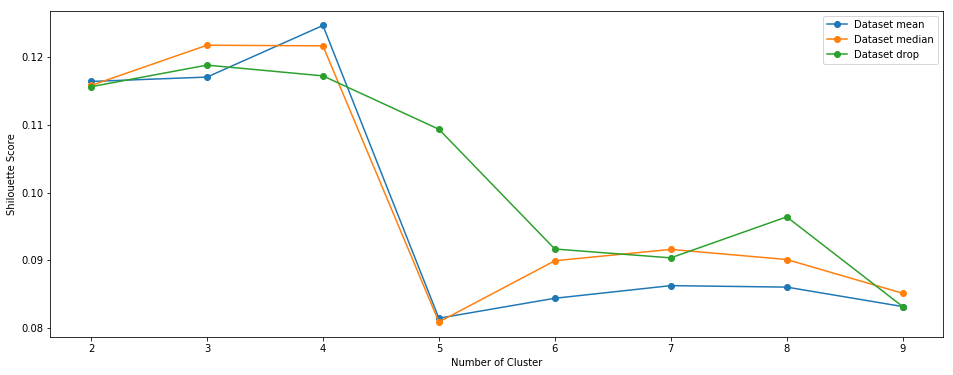

In [19]:
plt.figure(figsize=(16,6))
plt.ylabel('Shilouette Score')
plt.xlabel('Number of Cluster')
plt.plot(clusters_df_mean.num_clusters, clusters_df_mean.shilouette_score, marker = "o",label='Dataset mean')
plt.plot(clusters_df_median.num_clusters, clusters_df_median.shilouette_score, marker = "o",label='Dataset median')
plt.plot(clusters_df_drop.num_clusters, clusters_df_drop.shilouette_score, marker = "o",label='Dataset drop')
plt.legend()

SS Impute dataset_median : 	0.5031775364090251
SS Impute dataset_drop : 	0.5084285544326723
SS Impute dataset_mean : 	0.4888765399246304


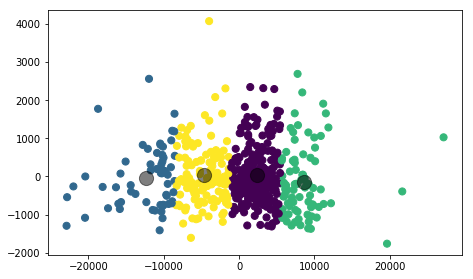

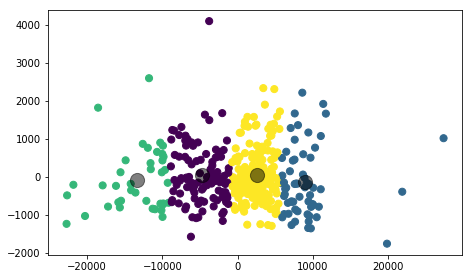

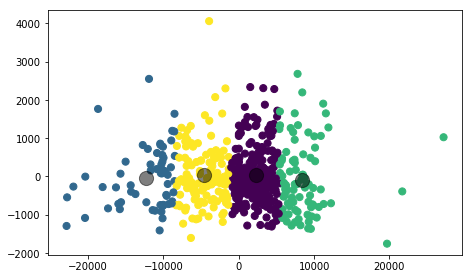

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import metrics

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(dataset_median)
kmeans_cluster = KMeans(n_clusters=4, random_state=0)
kmeans_cluster.fit(sklearn_transf)
y_kmeans = kmeans_cluster.predict(sklearn_transf)

fig = plt.figure()
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

plt.scatter(sklearn_transf[:, 0], sklearn_transf[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

silhouette_score = metrics.silhouette_score(sklearn_transf,kmeans_cluster.labels_,metric ='euclidean')
print("SS Impute dataset_median : \t"+str(silhouette_score))


sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(dataset_drop)
kmeans_cluster = KMeans(n_clusters=4, random_state=0)
kmeans_cluster.fit(sklearn_transf)
y_kmeans = kmeans_cluster.predict(sklearn_transf)

fig = plt.figure()
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

plt.scatter(sklearn_transf[:, 0], sklearn_transf[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

silhouette_score = metrics.silhouette_score(sklearn_transf,kmeans_cluster.labels_,metric ='euclidean')
print("SS Impute dataset_drop : \t"+str(silhouette_score))


sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(dataset_mean)
kmeans_cluster = KMeans(n_clusters=4, random_state=0)
kmeans_cluster.fit(sklearn_transf)
y_kmeans = kmeans_cluster.predict(sklearn_transf)

fig = plt.figure()
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

plt.scatter(sklearn_transf[:, 0], sklearn_transf[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_cluster.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

silhouette_score = metrics.silhouette_score(sklearn_transf,kmeans_cluster.labels_,metric ='euclidean')
print("SS Impute dataset_mean : \t"+str(silhouette_score))